## **Online Shoppers Purchasing Intention Dataset**

## **Data Set Information**

The dataset contains 12,330 data. It has 18 attributes. 10 of the attributes are numerical and 8 of them are categorical. 84.5% of the data are those who do not finish the transaction with shopping, the remaining 15.5% are those who finish the transaction with shopping.

## **ATTRIBUTES**

**Numerical Attributes**
*   Administrative - The number of pages visited by visitors regarding account information and management.
*   Administrative Duration - The length of time visitors stay on the pages they visit regarding account information and management.
*   Informational - Number of informative pages visited by visitors.
*   Informational Duration - Time spent on informative pages visited by visitors
*   Product Related - Pages visited by visitors containing products and their information.
*   Product Related Duration - The length of time visitors are on the pages they visit, including products and their information.
*   Bounce Rate - Average bounce rate of pages visited.
*   Exit Rate - Average exit rate of pages visited.
*   Page Value - Average page value of pages visited.
*   Special Day - Whether the visiting hours are close to a special day.

**Categorical Attributes**
*   Operating system - The operating system the visitor is using.
*   Browser - The browser the visitor is using.
*   Region - The geographic region in which the visitor is transacting.
*   TrafficType - Traffic type (sms, direct etc.)
*   VisitorType -Visitor types such as new visitor, returning visitor, and others.
*   Weekend - Value indicating whether the visit was made on a weekend.
*   Month - The value in months of the visit date.
*   Revenue -The value of whether the visit resulted in a transaction or not.












## **Importing Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

## **Importing Dataset** 

In [ ]:
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/00468/online_shoppers_intention.csv")

## **Description of Dataset** 

In [ ]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [ ]:
df.tail()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False
12329,0,0.0,0,0.0,3,21.250000,0.000000,0.066667,0.000000,0.0,Nov,3,2,1,2,New_Visitor,True,False


## **Improving Feature Names**

In [ ]:
df.columns=['Administrative','Administrative Duration','Informational','Informational Duration','Product Related','Product Related Duration','Bounce Rates','Exit Rates','Page Values','Special Day','Month','Operating Systems','Browser','Region','Traffic Type','Visitor Type', 'Weekend', 'Revenue'  ]

In [ ]:
df.head()

,Administrative,Administrative Duration,Informational,Informational Duration,Product Related,Product Related Duration,Bounce Rates,Exit Rates,Page Values,Special Day,Month,Operating Systems,Browser,Region,Traffic Type,Visitor Type,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


## **Shape of Dataset**

In [ ]:
df.shape

(12330, 18)

## **Summary of Dataset**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Administrative            12330 non-null  int64  
 1   Administrative Duration   12330 non-null  float64
 2   Informational             12330 non-null  int64  
 3   Informational Duration    12330 non-null  float64
 4   Product Related           12330 non-null  int64  
 5   Product Related Duration  12330 non-null  float64
 6   Bounce Rates              12330 non-null  float64
 7   Exit Rates                12330 non-null  float64
 8   Page Values               12330 non-null  float64
 9   Special Day               12330 non-null  float64
 10  Month                     12330 non-null  object 
 11  Operating Systems         12330 non-null  int64  
 12  Browser                   12330 non-null  int64  
 13  Region                    12330 non-null  int64  
 14  Traffi

## **Statistical Calculations of Numerical Data**

In [ ]:
df[['Administrative', 'Administrative Duration', 'Informational', 'Informational Duration', 'Product Related', 'Product Related Duration', 'Bounce Rates', 'Exit Rates', 'Page Values', 'Special Day']].describe()

,Administrative,Administrative Duration,Informational,Informational Duration,Product Related,Product Related Duration,Bounce Rates,Exit Rates,Page Values,Special Day
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157213,0.016813,0.050000,0.000000,0.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000


## **Checking for Missing Values**

In [ ]:
df.isnull().sum()

Administrative              0
Administrative Duration     0
Informational               0
Informational Duration      0
Product Related             0
Product Related Duration    0
Bounce Rates                0
Exit Rates                  0
Page Values                 0
Special Day                 0
Month                       0
Operating Systems           0
Browser                     0
Region                      0
Traffic Type                0
Visitor Type                0
Weekend                     0
Revenue                     0
dtype: int64

## **Data Types**

In [ ]:
df.dtypes

Administrative                int64
Administrative Duration     float64
Informational                 int64
Informational Duration      float64
Product Related               int64
Product Related Duration    float64
Bounce Rates                float64
Exit Rates                  float64
Page Values                 float64
Special Day                 float64
Month                        object
Operating Systems             int64
Browser                       int64
Region                        int64
Traffic Type                  int64
Visitor Type                 object
Weekend                        bool
Revenue                        bool
dtype: object

### **Numerical and Categorical Data**

In [ ]:
numericalVariables=df.describe().columns
print('Number of Numerical Variables: '+str(len(numericalVariables)))
print(numericalVariables)

Number of Numerical Variables: 14
Index(['Administrative', 'Administrative Duration', 'Informational',
       'Informational Duration', 'Product Related', 'Product Related Duration',
       'Bounce Rates', 'Exit Rates', 'Page Values', 'Special Day',
       'Operating Systems', 'Browser', 'Region', 'Traffic Type'],
      dtype='object')


In [ ]:
categoricalVariables=df.describe(include=[object]).columns
print('Number of Categorical Variables: '+str(len(categoricalVariables)))
print(categoricalVariables)

Number of Categorical Variables: 2
Index(['Month', 'Visitor Type'], dtype='object')


In [ ]:
categoricalVariables = ['Month', 'Visitor Type','Operating Systems', 'Browser', 'Region', 'Traffic Type','Weekend','Revenue']
numericalVariables = ['Administrative', 'Administrative Duration', 'Informational',
       'Informational Duration', 'Product Related', 'Product Related Duration',
       'Bounce Rates', 'Exit Rates', 'Page Values', 'Special Day']

In [ ]:
df.dtypes

Administrative                int64
Administrative Duration     float64
Informational                 int64
Informational Duration      float64
Product Related               int64
Product Related Duration    float64
Bounce Rates                float64
Exit Rates                  float64
Page Values                 float64
Special Day                 float64
Month                        object
Operating Systems             int64
Browser                       int64
Region                        int64
Traffic Type                  int64
Visitor Type                 object
Weekend                        bool
Revenue                        bool
dtype: object

In [ ]:
print('Number of Categorical Variables: '+str(len(categoricalVariables)))
print(categoricalVariables)

Number of Categorical Variables: 8
['Month', 'Visitor Type', 'Operating Systems', 'Browser', 'Region', 'Traffic Type', 'Weekend', 'Revenue']


In [ ]:
print('Number of Numerical Variables: '+str(len(numericalVariables)))
print(numericalVariables)

Number of Numerical Variables: 10
['Administrative', 'Administrative Duration', 'Informational', 'Informational Duration', 'Product Related', 'Product Related Duration', 'Bounce Rates', 'Exit Rates', 'Page Values', 'Special Day']


In [ ]:
corr = df.corr()
corr

,Administrative,Administrative Duration,Informational,Informational Duration,Product Related,Product Related Duration,Bounce Rates,Exit Rates,Page Values,Special Day,Operating Systems,Browser,Region,Traffic Type,Weekend,Revenue
Administrative,1.000000,0.601583,0.376850,0.255848,0.431119,0.373939,-0.223563,-0.316483,0.098990,-0.094778,-0.006347,-0.025035,-0.005487,-0.033561,0.026417,0.138917
Administrative Duration,0.601583,1.000000,0.302710,0.238031,0.289087,0.355422,-0.144170,-0.205798,0.067608,-0.073304,-0.007343,-0.015392,-0.005561,-0.014376,0.014990,0.093587
Informational,0.376850,0.302710,1.000000,0.618955,0.374164,0.387505,-0.116114,-0.163666,0.048632,-0.048219,-0.009527,-0.038235,-0.029169,-0.034491,0.035785,0.095200
Informational Duration,0.255848,0.238031,0.618955,1.000000,0.280046,0.347364,-0.074067,-0.105276,0.030861,-0.030577,-0.009579,-0.019285,-0.027144,-0.024675,0.024078,0.070345
Product Related,0.431119,0.289087,0.374164,0.280046,1.000000,0.860927,-0.204578,-0.292526,0.056282,-0.023958,0.004290,-0.013146,-0.038122,-0.043064,0.016092,0.158538
Product Related Duration,0.373939,0.355422,0.387505,0.347364,0.860927,1.000000,-0.184541,-0.251984,0.052823,-0.036380,0.002976,-0.007380,-0.033091,-0.036377,0.007311,0.152373
Bounce Rates,-0.223563,-0.144170,-0.116114,-0.074067,-0.204578,-0.184541,1.000000,0.913004,-0.119386,0.072702,0.023823,-0.015772,-0.006485,0.078286,-0.046514,-0.150673
Exit Rates,-0.316483,-0.205798,-0.163666,-0.105276,-0.292526,-0.251984,0.913004,1.000000,-0.174498,0.102242,0.014567,-0.004442,-0.008907,0.078616,-0.062587,-0.207071
Page Values,0.098990,0.067608,0.048632,0.030861,0.056282,0.052823,-0.119386,-0.174498,1.000000,-0.063541,0.018508,0.045592,0.011315,0.012532,0.012002,0.492569
Special Day,-0.094778,-0.073304,-0.048219,-0.030577,-0.023958,-0.036380,0.072702,0.102242,-0.063541,1.000000,0.012652,0.003499,-0.016098,0.052301,-0.016767,-0.082305


In [ ]:
corr = corr[['Administrative', 'Administrative Duration', 'Informational', 'Informational Duration', 'Product Related', 'Product Related Duration', 'Bounce Rates', 'Exit Rates', 'Page Values', 'Special Day']]
corr = corr[0:10]
corr

,Administrative,Administrative Duration,Informational,Informational Duration,Product Related,Product Related Duration,Bounce Rates,Exit Rates,Page Values,Special Day
Administrative,1.000000,0.601583,0.376850,0.255848,0.431119,0.373939,-0.223563,-0.316483,0.098990,-0.094778
Administrative Duration,0.601583,1.000000,0.302710,0.238031,0.289087,0.355422,-0.144170,-0.205798,0.067608,-0.073304
Informational,0.376850,0.302710,1.000000,0.618955,0.374164,0.387505,-0.116114,-0.163666,0.048632,-0.048219
Informational Duration,0.255848,0.238031,0.618955,1.000000,0.280046,0.347364,-0.074067,-0.105276,0.030861,-0.030577
Product Related,0.431119,0.289087,0.374164,0.280046,1.000000,0.860927,-0.204578,-0.292526,0.056282,-0.023958
Product Related Duration,0.373939,0.355422,0.387505,0.347364,0.860927,1.000000,-0.184541,-0.251984,0.052823,-0.036380
Bounce Rates,-0.223563,-0.144170,-0.116114,-0.074067,-0.204578,-0.184541,1.000000,0.913004,-0.119386,0.072702
Exit Rates,-0.316483,-0.205798,-0.163666,-0.105276,-0.292526,-0.251984,0.913004,1.000000,-0.174498,0.102242
Page Values,0.098990,0.067608,0.048632,0.030861,0.056282,0.052823,-0.119386,-0.174498,1.000000,-0.063541
Special Day,-0.094778,-0.073304,-0.048219,-0.030577,-0.023958,-0.036380,0.072702,0.102242,-0.063541,1.000000


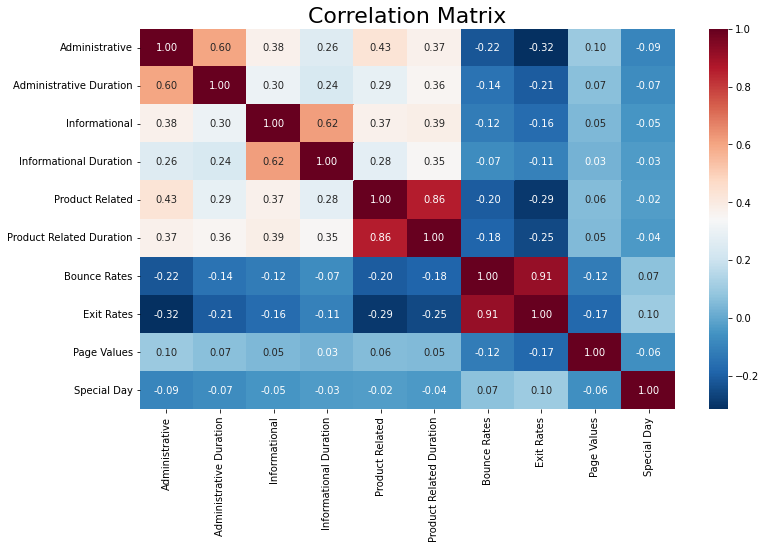

In [ ]:
f, ax = plt.subplots(figsize= [12,7])
sns.heatmap(corr, annot=True, fmt=".2f", ax=ax, cmap = "RdBu_r" )
ax.set_title("Correlation Matrix", fontsize=22)
plt.show()  

### **Visualizations of Numerical and Categorical Data**


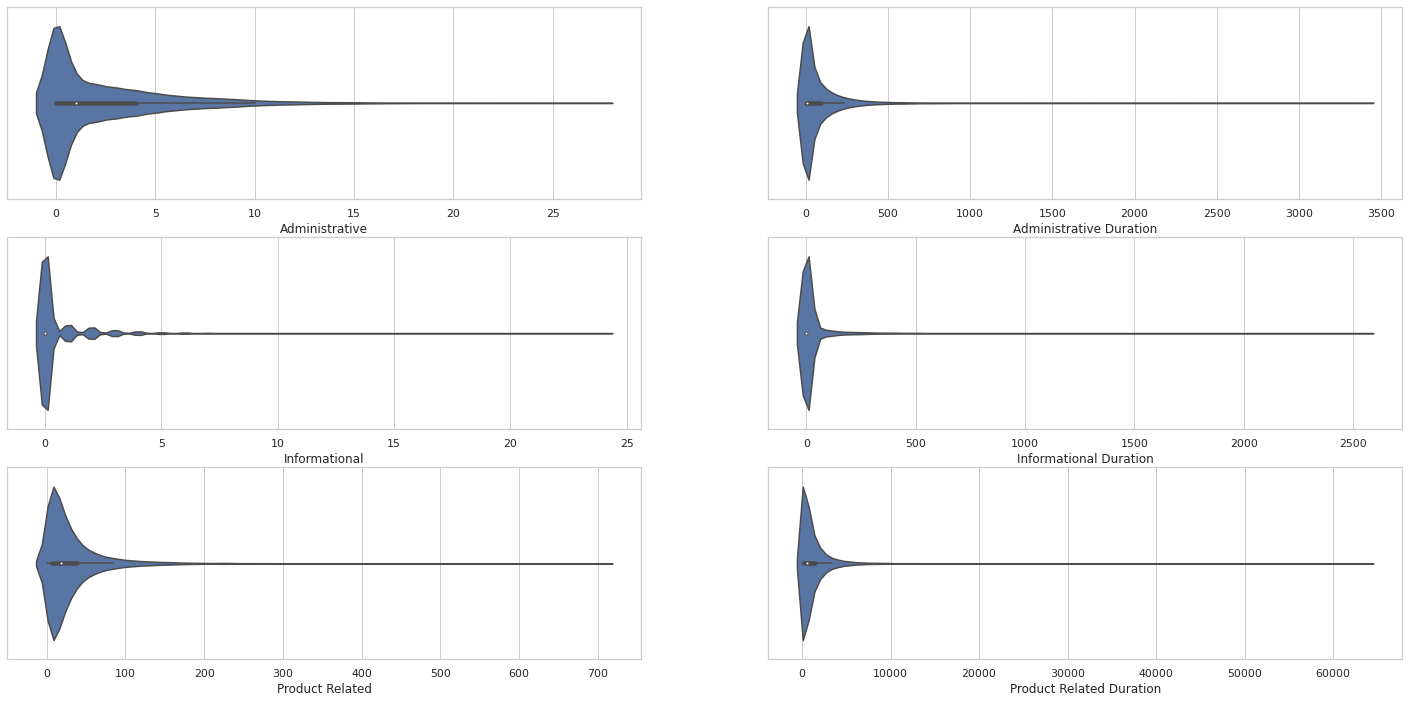

In [ ]:
j=0
fig = plt.figure(figsize=(25,12))
sns.set_theme(style="whitegrid")
for var in numericalVariables: 
  if j<6: 
    plt.subplot(3,2,(j+1))
    sns.violinplot(x=df[var])
    j+=1
    fig.show()

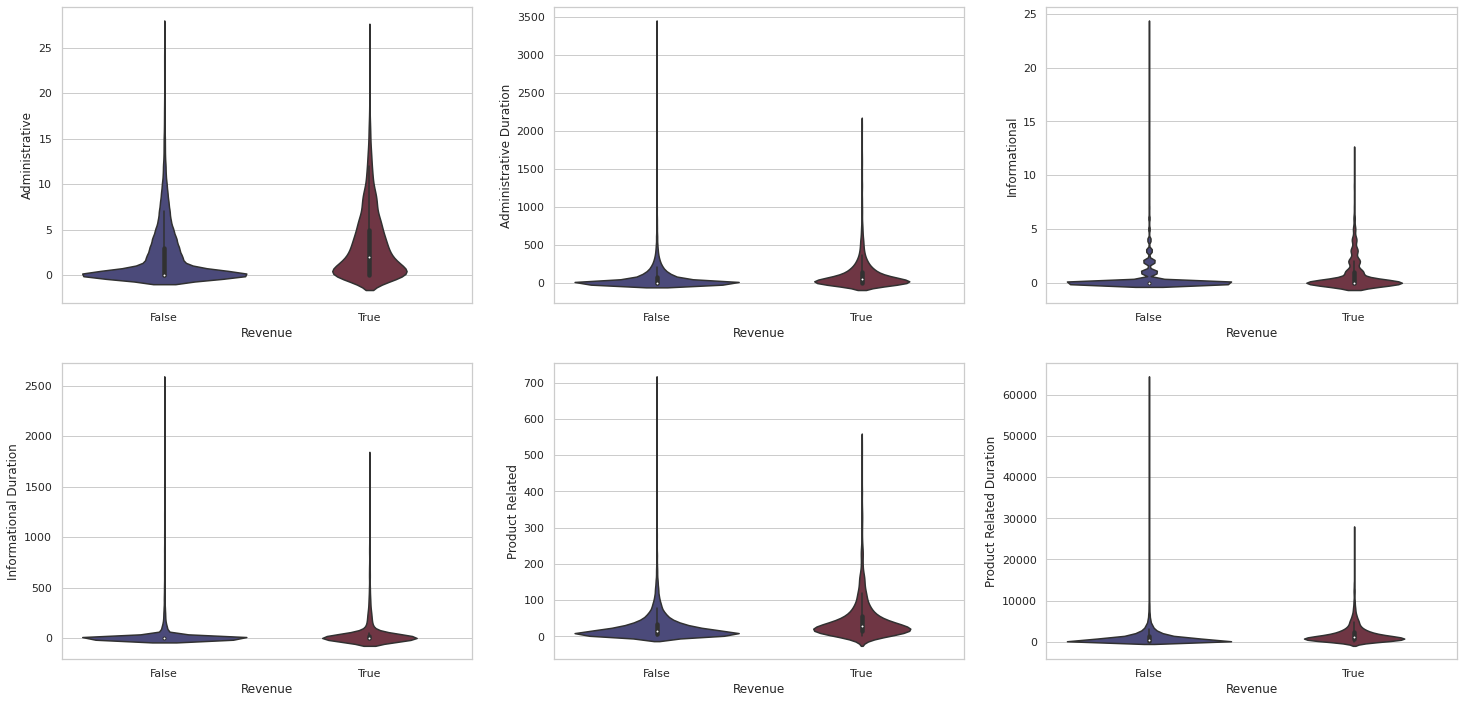

In [ ]:
j=0
fig = plt.figure(figsize=(25,12))
for var in numericalVariables: 
  if j<6: 
    plt.subplot(2,3,(j+1))
    sns.violinplot(data=df, x='Revenue', y=var,palette="icefire")
    j+=1
    fig.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

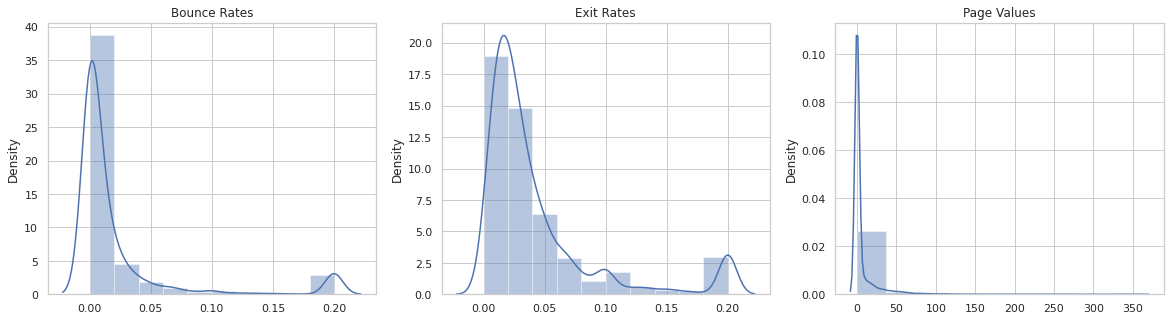

In [ ]:
#Bounce Rates, Exit Rates, Page Values
pageMetric = ['Bounce Rates', 'Exit Rates', 'Page Values']
p=1
fig = plt.figure(figsize=(20,5))
for var in pageMetric:

  plt.subplot(1,3,p)
  sns.distplot(x=df[var],bins=10)
  plt.title(var)
  p+=1
  fig.show()

In [ ]:
false_revenue = df[df["Revenue"] == False]
true_revenue = df[df["Revenue"] == True]

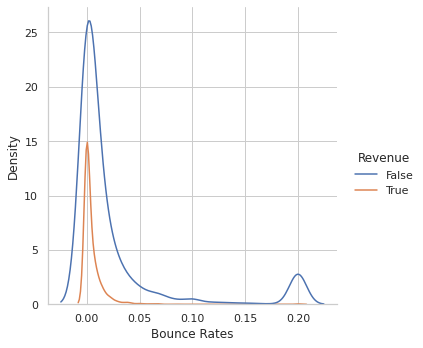

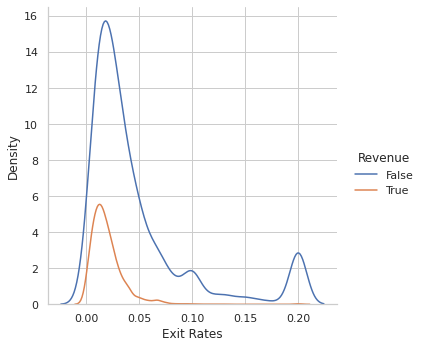

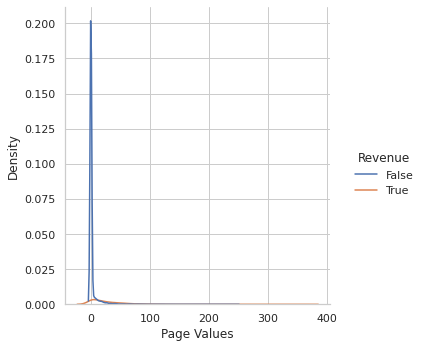

In [ ]:
sns.displot(data=df, x='Bounce Rates', hue='Revenue', kind='kde')
plt.show()

sns.displot(data=df, x='Exit Rates', hue='Revenue', kind='kde')
plt.show()

sns.displot(data=df, x='Page Values', hue='Revenue', kind='kde')
plt.show()


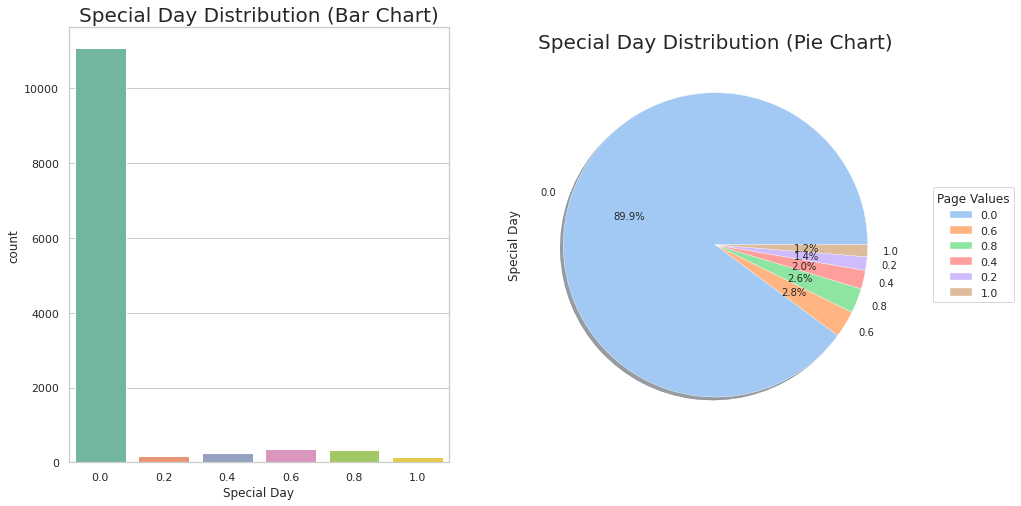

In [ ]:
#SpecialDay
fig = plt.figure(figsize=(15,8))

plt.subplot(1,2,1)
sns.countplot(x=df['Special Day'], palette='Set2')
plt.title('Special Day Distribution (Bar Chart)', fontdict = {'fontsize' : 20})


plt.subplot(1,2,2)
colors = sns.color_palette('pastel')[0:6]
df['Special Day'].value_counts().plot(kind='pie',colors=colors,shadow=True, autopct='%.1f%%',
wedgeprops={'linewidth': 0.4, 'edgecolor': 'white'}, textprops={'fontsize': 10});
plt.title('Special Day Distribution (Pie Chart)', fontdict = {'fontsize' : 20})
plt.legend(title=var,loc="center right",
            bbox_to_anchor = (1.3, 0.5, 0, 0))
plt.show()

In [ ]:
print("Categorical Variables in the Online Shoppers Intention Dataset")
print("--------------------------------------------------------------\n")
for var in categoricalVariables:
  print(var +':')
  print("--------------------------------------------------------------")
  print(df[var].value_counts())
  print('\n')

Categorical Variables in the Online Shoppers Intention Dataset
--------------------------------------------------------------

Month:
--------------------------------------------------------------
May     3364
Nov     2998
Mar     1907
Dec     1727
Oct      549
Sep      448
Aug      433
Jul      432
June     288
Feb      184
Name: Month, dtype: int64


Visitor Type:
--------------------------------------------------------------
Returning_Visitor    10551
New_Visitor           1694
Other                   85
Name: Visitor Type, dtype: int64


Operating Systems:
--------------------------------------------------------------
2    6601
1    2585
3    2555
4     478
8      79
6      19
7       7
5       6
Name: Operating Systems, dtype: int64


Browser:
--------------------------------------------------------------
2     7961
1     2462
4      736
5      467
6      174
10     163
8      135
3      105
13      61
7       49
12      10
11       6
9        1
Name: Browser, dtype: int64


Regio

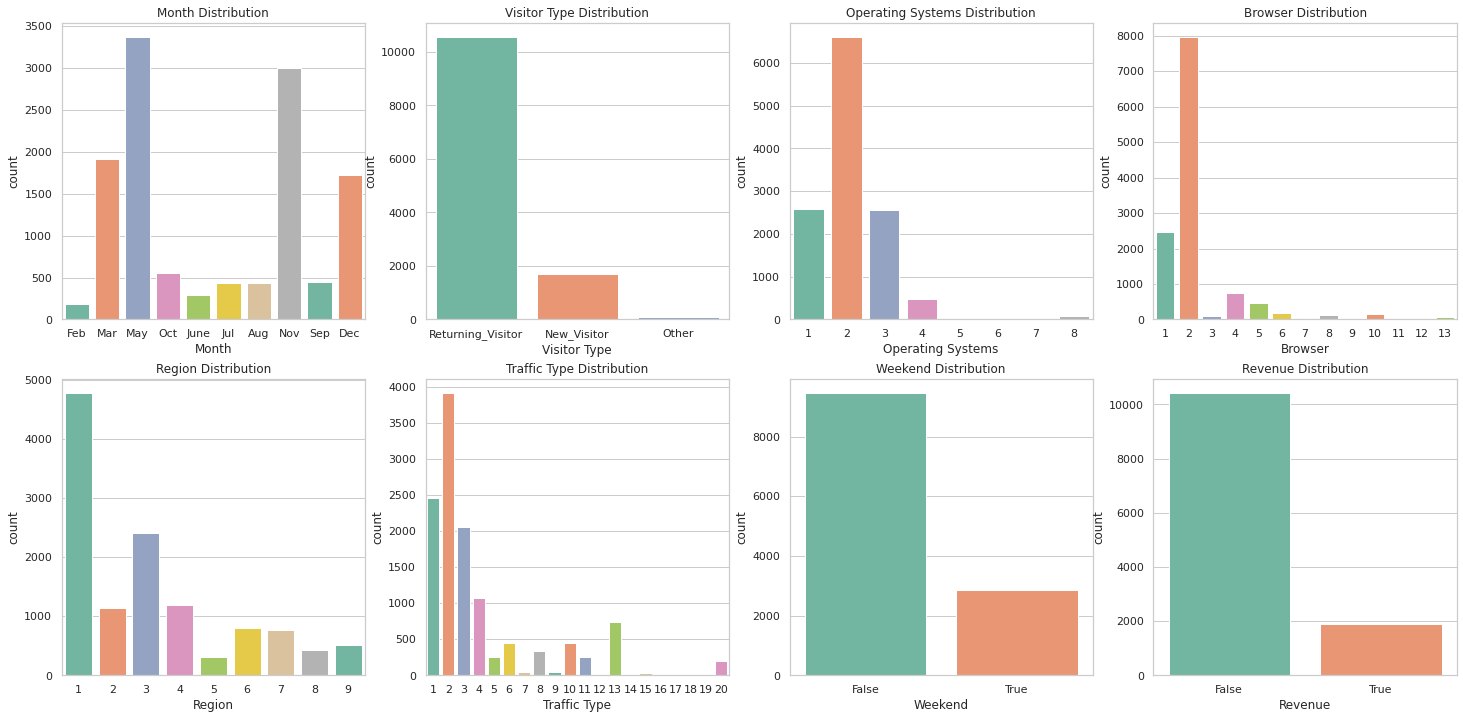

In [ ]:
fig = plt.figure(figsize=(25,12))
p=1
for var in categoricalVariables:
  plt.subplot(2,4,p)
  plt.title(var+ " Distribution")
  sns.countplot(x=df[var], palette='Set2')
  fig.show()
  p+=1


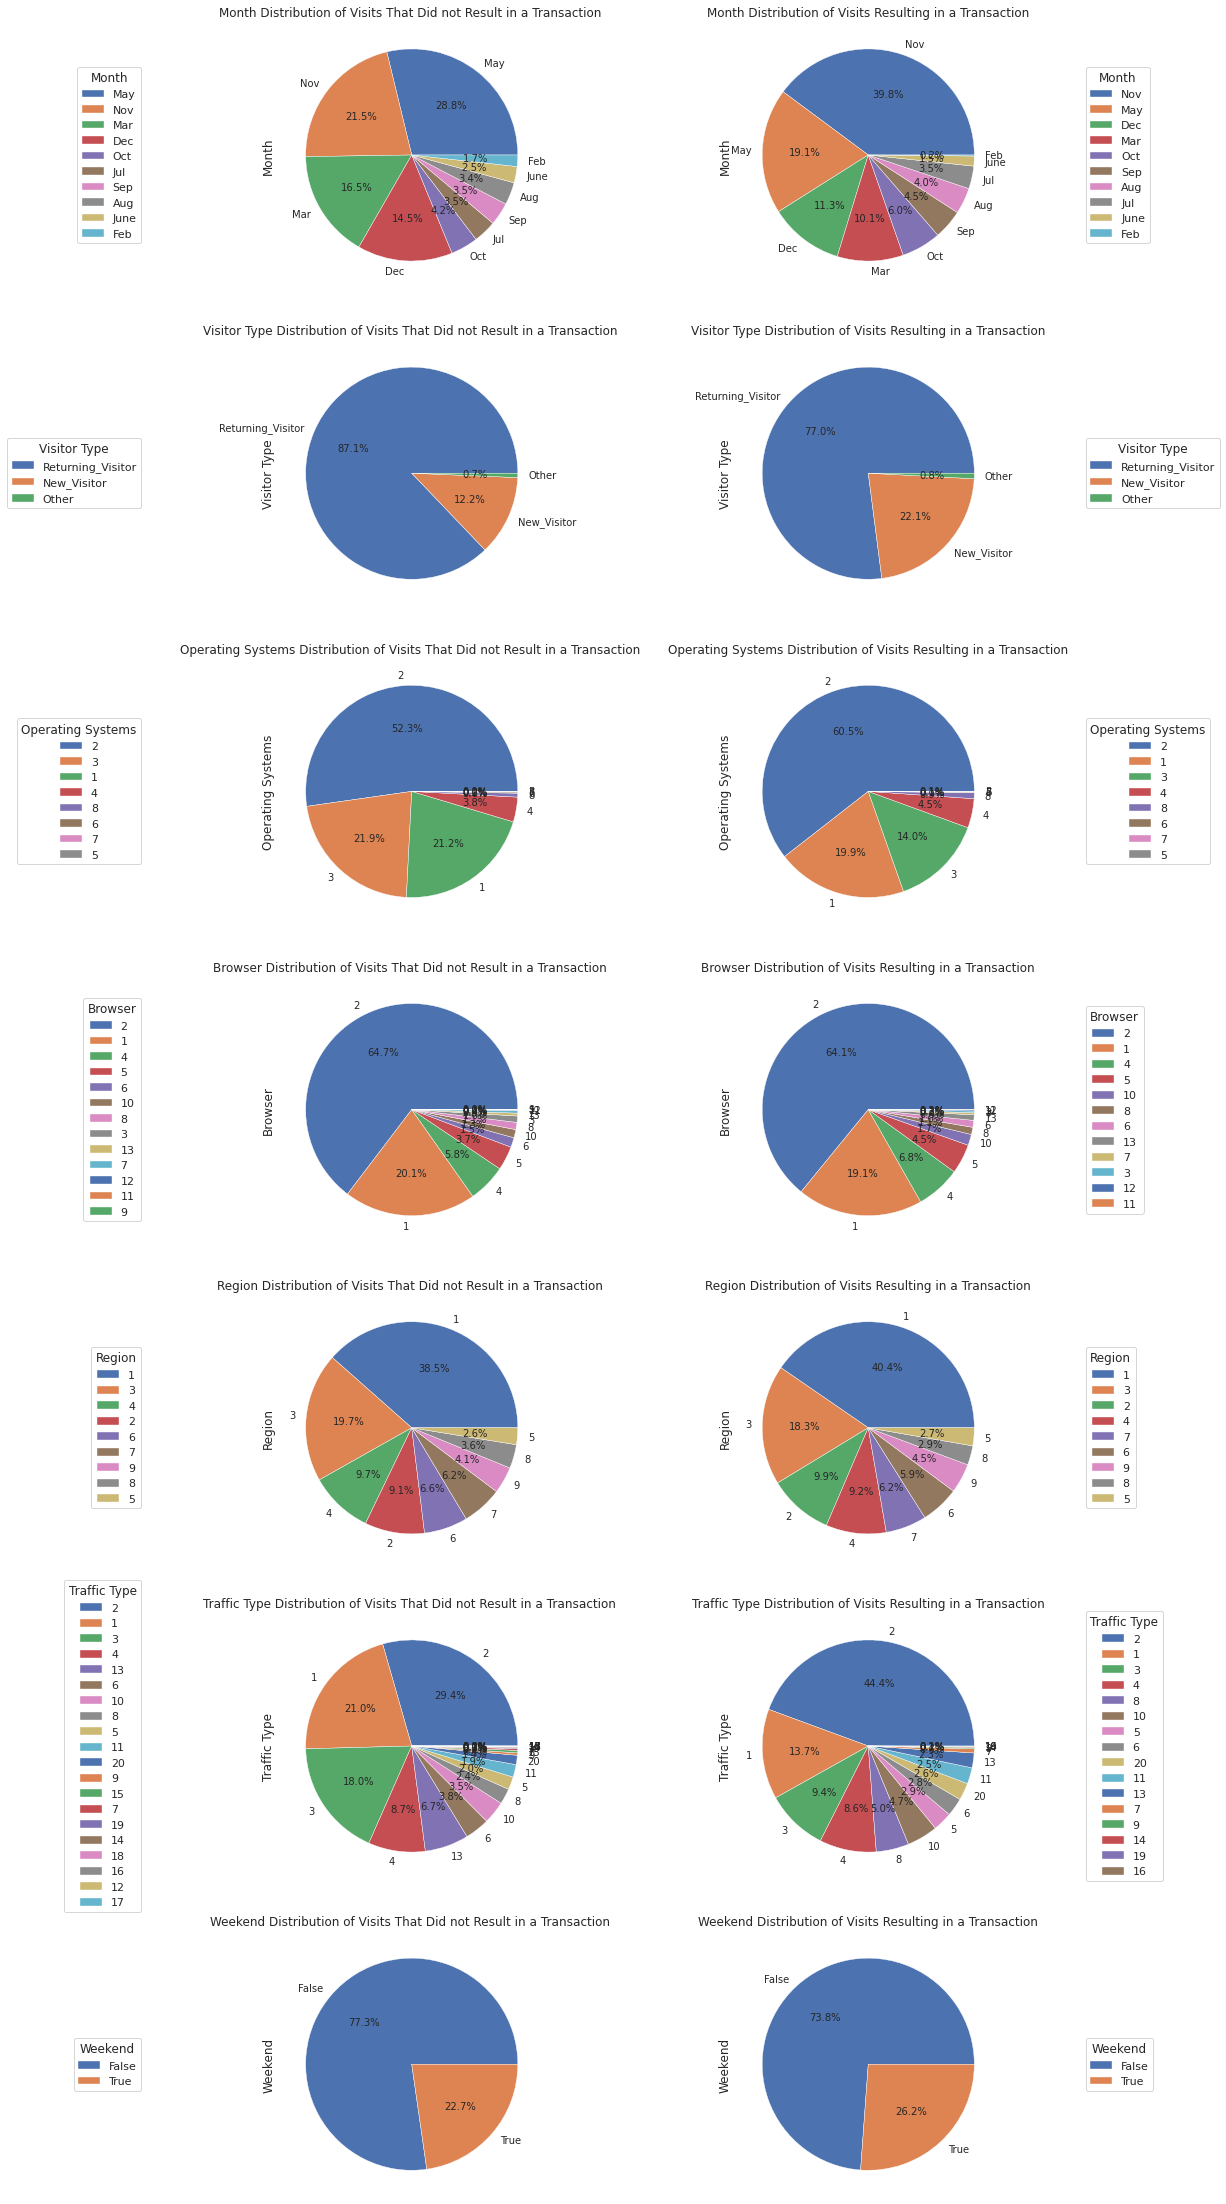

In [ ]:
i=0
p=1
plt.figure(figsize=[15,40])
for var in categoricalVariables:
  if i<=6:
    plt.subplot(7,2,p)
    false_revenue[var].value_counts().plot(kind='pie',autopct='%.1f%%',
    wedgeprops={'linewidth': 0.4, 'edgecolor': 'white'}, textprops={'fontsize': 10});
    plt.title(var+" Distribution of Visits That Did not Result in a Transaction ", fontdict = {'fontsize' : 12})
    plt.legend(title=var,loc="center right",
               bbox_to_anchor = (-0.5, 0.5, 0, 0))
    p+=1
    
    plt.subplot(7,2,p)
    true_revenue[var].value_counts().plot(kind='pie',autopct='%.1f%%',
    wedgeprops={'linewidth': 0.4, 'edgecolor': 'white'}, textprops={'fontsize': 10});
    plt.title(var+" Distribution of Visits Resulting in a Transaction", fontdict = {'fontsize' : 12})
    plt.legend(title=var,loc="center left",
               bbox_to_anchor = (1.3, 0.5, 0, 0))
    p+=1
    
    fig.show()
    i+=1
  else:
    break

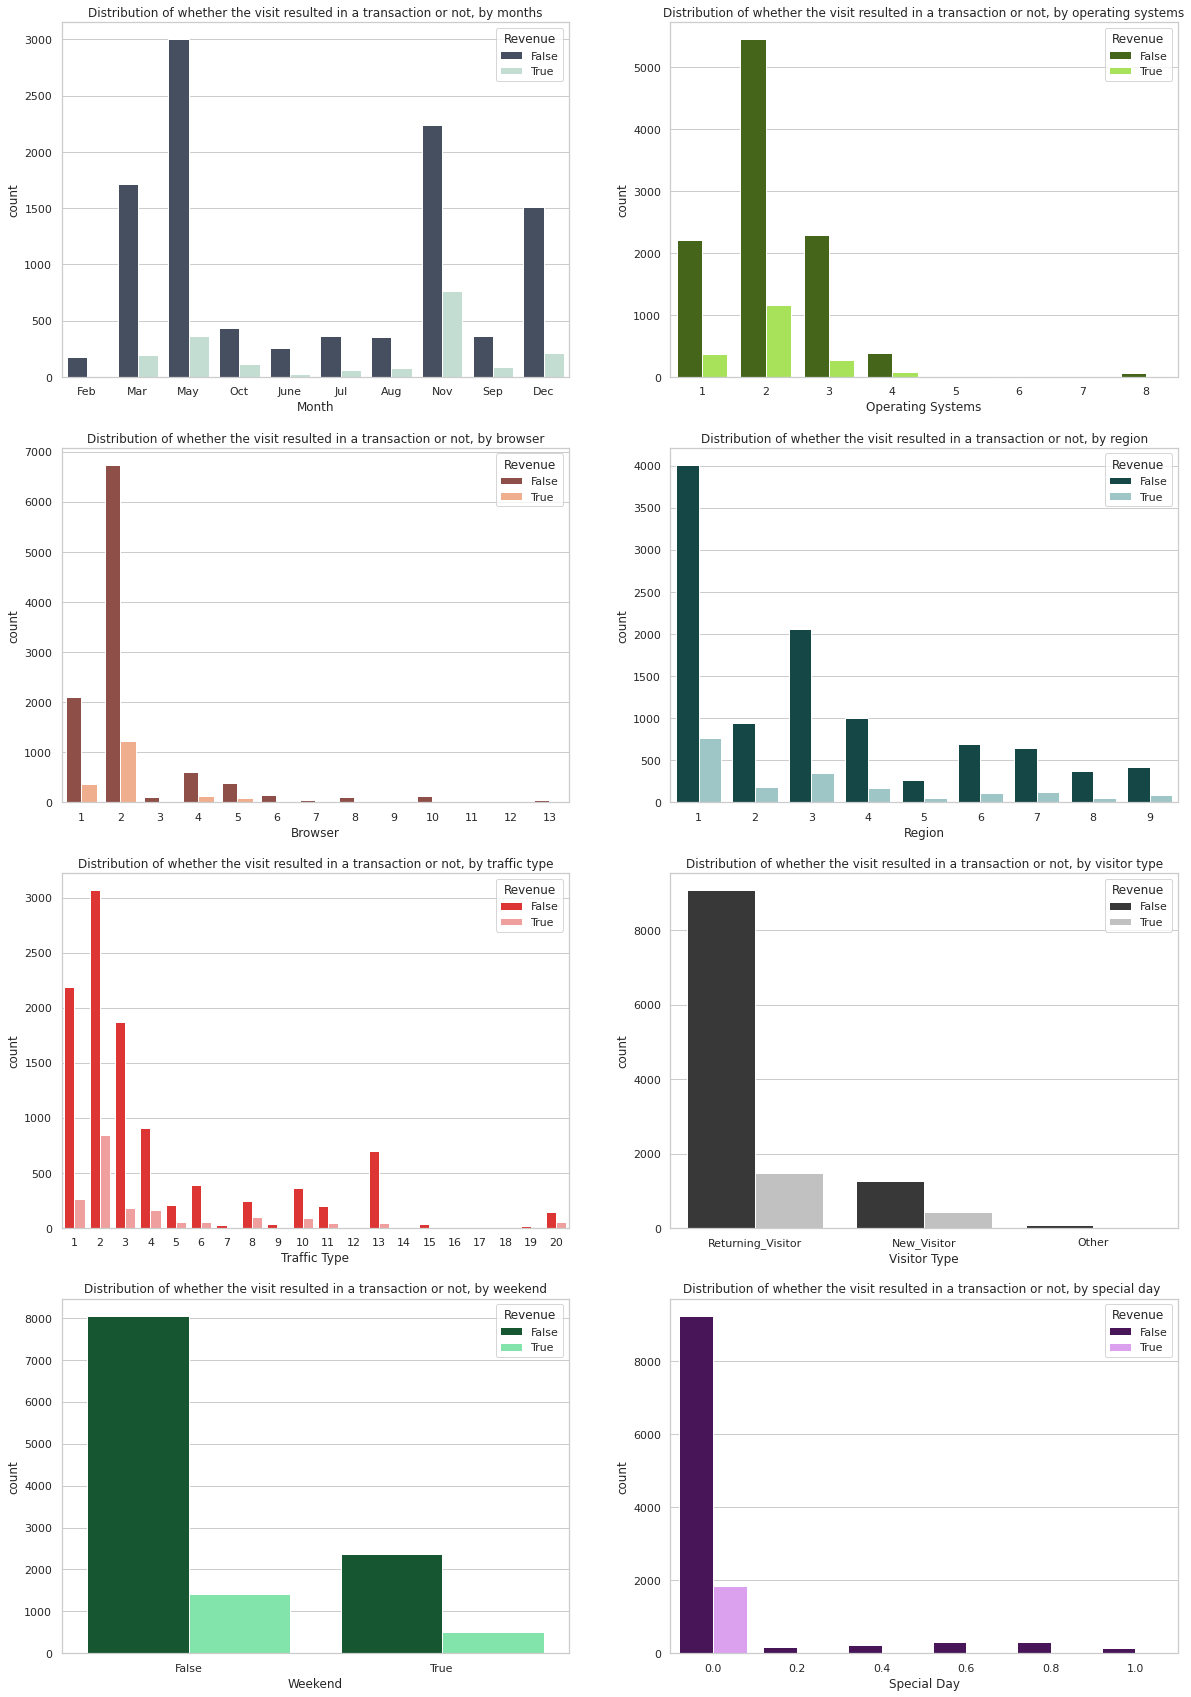

In [ ]:
fig = plt.figure(figsize=(20,30))

plt.subplot(4,2,1)
sns.countplot(x='Month', hue='Revenue', data=df,palette=["#424e63", "#c0e1d2"])
plt.legend(loc='upper right', title='Revenue')
plt.title("Distribution of whether the visit resulted in a transaction or not, by months", fontdict = {'fontsize' : 12})

plt.subplot(4,2,2)
sns.countplot(x='Operating Systems', hue='Revenue', data=df,palette=["#47730D", "#AAF943"])
plt.legend(loc='upper right', title='Revenue')
plt.title("Distribution of whether the visit resulted in a transaction or not, by operating systems", fontdict = {'fontsize' : 12})

plt.subplot(4,2,3)
sns.countplot(x='Browser', hue='Revenue', data=df,palette=["#9a463d", "#ffa97e"])
plt.legend(loc='upper right', title='Revenue')
plt.title("Distribution of whether the visit resulted in a transaction or not, by browser", fontdict = {'fontsize' : 12})

plt.subplot(4,2,4)
sns.countplot(x='Region', hue='Revenue', data=df,palette=["#0c4f4e", "#99cccc"])
plt.legend(loc='upper right', title='Revenue')
plt.title("Distribution of whether the visit resulted in a transaction or not, by region", fontdict = {'fontsize' : 12})

plt.subplot(4,2,5)
sns.countplot(x='Traffic Type', hue='Revenue', data=df,palette=["#F91818", "#FE9191"])
plt.legend(loc='upper right', title='Revenue')
plt.title("Distribution of whether the visit resulted in a transaction or not, by traffic type", fontdict = {'fontsize' : 12})

plt.subplot(4,2,6)
sns.countplot(x='Visitor Type', hue='Revenue', data=df,palette=["#393839", "#C1C1C1"])
plt.legend(loc='upper right', title='Revenue')
plt.title("Distribution of whether the visit resulted in a transaction or not, by visitor type", fontdict = {'fontsize' : 12})

plt.subplot(4,2,7)
sns.countplot(x='Weekend', hue='Revenue', data=df,palette=["#0B612F", "#71F5A7"])
plt.legend(loc='upper right', title='Revenue')
plt.title("Distribution of whether the visit resulted in a transaction or not, by weekend", fontdict = {'fontsize' : 12})

plt.subplot(4,2,8)
sns.countplot(x='Special Day', hue='Revenue', data=df,palette=["#4D0A63", "#E294FB"])
plt.legend(loc='upper right', title='Revenue')
plt.title("Distribution of whether the visit resulted in a transaction or not, by special day ", fontdict = {'fontsize' : 12})

plt.show()


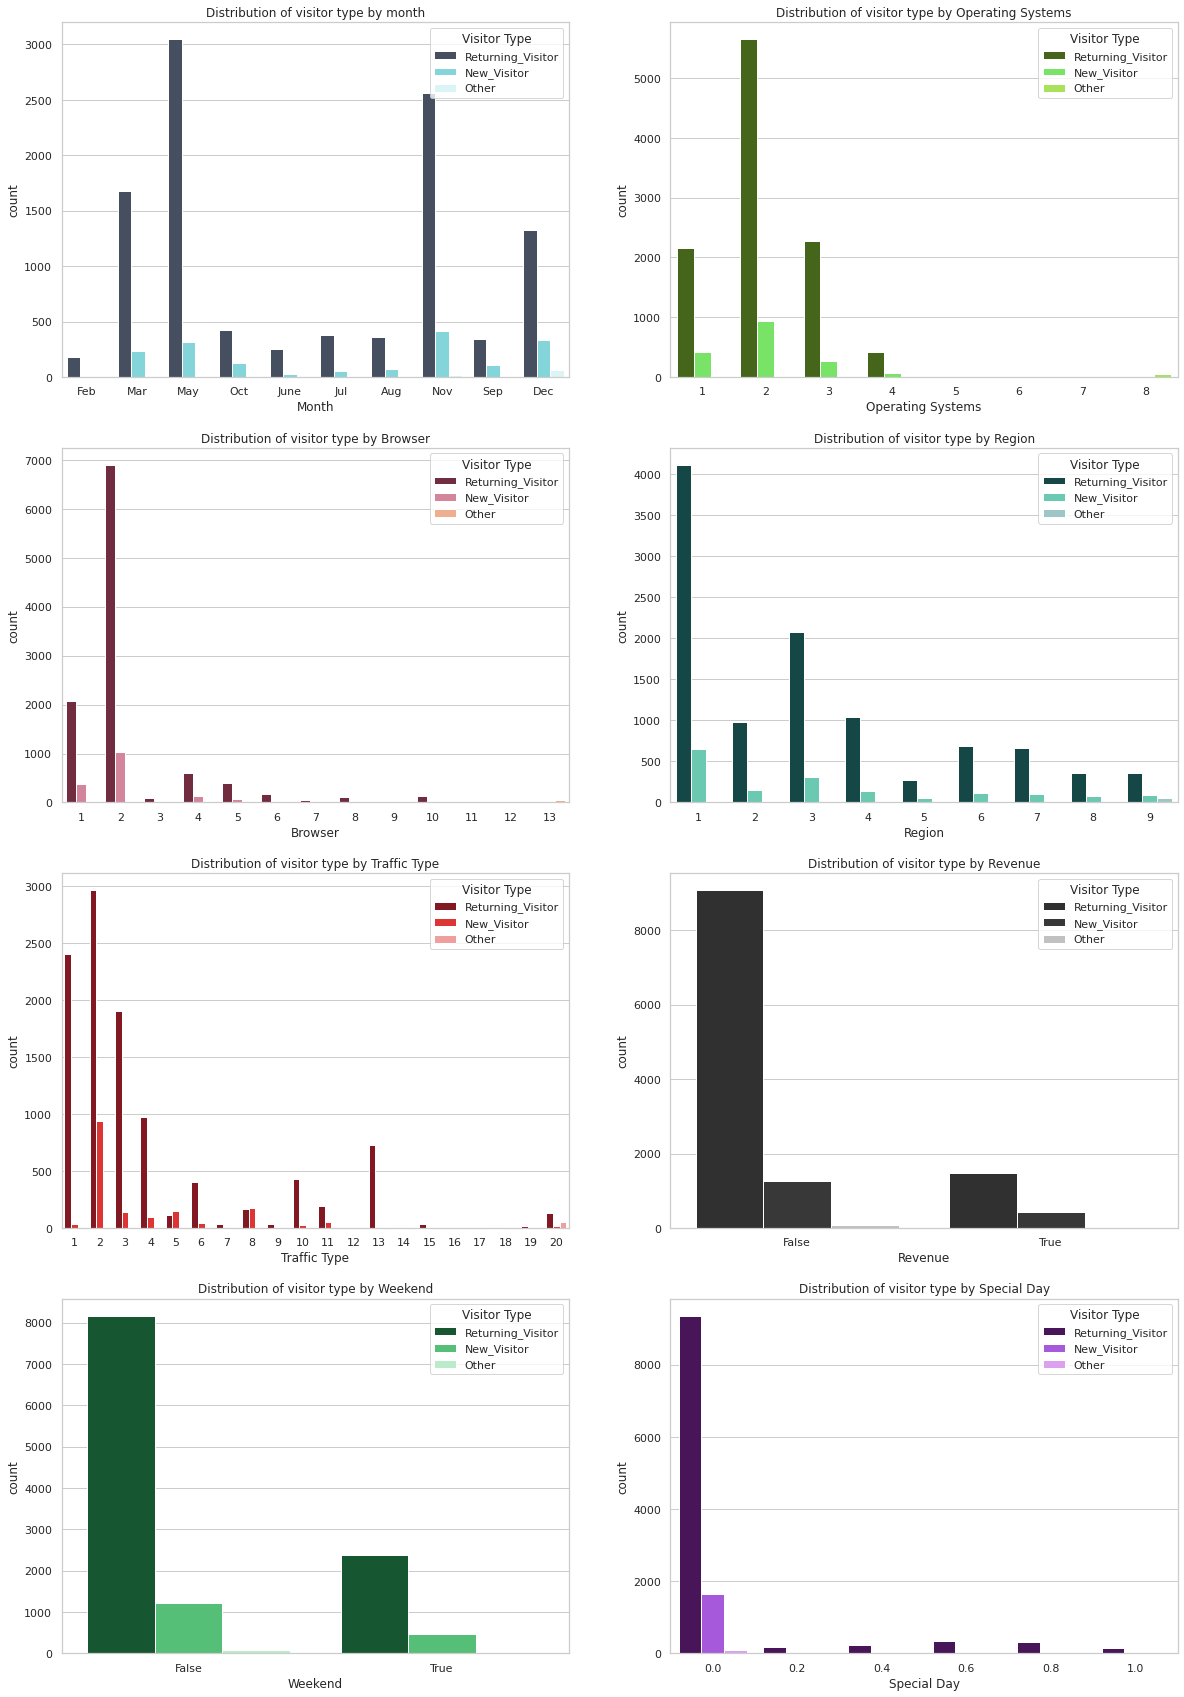

In [ ]:
fig = plt.figure(figsize=(20,30))

plt.subplot(4,2,1)
sns.countplot(x='Month', hue='Visitor Type', data=df,palette=["#424e63","#75E2E8", "#D7F9FA"])
plt.legend(loc='upper right', title='Visitor Type')
plt.title("Distribution of visitor type by month", fontdict = {'fontsize' : 12})

plt.subplot(4,2,2)
sns.countplot(x='Operating Systems', hue='Visitor Type', data=df,palette=["#47730D","#69F753", "#AAF943"])
plt.legend(loc='upper right', title='Visitor Type')
plt.title("Distribution of visitor type by Operating Systems", fontdict = {'fontsize' : 12})

plt.subplot(4,2,3)
sns.countplot(x='Browser', hue='Visitor Type', data=df,palette=["#7E203B","#E07896", "#ffa97e"])
plt.legend(loc='upper right', title='Visitor Type')
plt.title("Distribution of visitor type by Browser", fontdict = {'fontsize' : 12})

plt.subplot(4,2,4)
sns.countplot(x='Region', hue='Visitor Type', data=df,palette=["#0c4f4e","#5CD9B8", "#99cccc"])
plt.legend(loc='upper right', title='Visitor Type')
plt.title("Distribution of visitor type by Region", fontdict = {'fontsize' : 12})

plt.subplot(4,2,5)
sns.countplot(x='Traffic Type', hue='Visitor Type', data=df,palette=["#920714","#F91818", "#FE9191"])
plt.legend(loc='upper right', title='Visitor Type')
plt.title("Distribution of visitor type by Traffic Type", fontdict = {'fontsize' : 12})

plt.subplot(4,2,6)
sns.countplot(x='Revenue', hue='Visitor Type', data=df,palette=["#303030","#393839", "#C1C1C1"])
plt.legend(loc='upper right', title='Visitor Type')
plt.title("Distribution of visitor type by Revenue", fontdict = {'fontsize' : 12})

plt.subplot(4,2,7)
sns.countplot(x='Weekend', hue='Visitor Type', data=df,palette=["#0B612F","#44D171", "#B4F3C9"])
plt.legend(loc='upper right', title='Visitor Type')
plt.title("Distribution of visitor type by Weekend", fontdict = {'fontsize' : 12})

plt.subplot(4,2,8)
sns.countplot(x='Special Day', hue='Visitor Type', data=df,palette=["#4D0A63","#AA44F1", "#E294FB"])
plt.legend(loc='upper right', title='Visitor Type')
plt.title("Distribution of visitor type by Special Day", fontdict = {'fontsize' : 12})

plt.show()

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Administrative            12330 non-null  int64  
 1   Administrative Duration   12330 non-null  float64
 2   Informational             12330 non-null  int64  
 3   Informational Duration    12330 non-null  float64
 4   Product Related           12330 non-null  int64  
 5   Product Related Duration  12330 non-null  float64
 6   Bounce Rates              12330 non-null  float64
 7   Exit Rates                12330 non-null  float64
 8   Page Values               12330 non-null  float64
 9   Special Day               12330 non-null  float64
 10  Month                     12330 non-null  object 
 11  Operating Systems         12330 non-null  int64  
 12  Browser                   12330 non-null  int64  
 13  Region                    12330 non-null  int64  
 14  Traffi

In [ ]:
df_copy=df.copy()

In [ ]:
#df_copy['Weekend'] = df_copy['Weekend'].astype('int')
#df_copy['Revenue'] = df_copy['Revenue'].astype('int')

label_encoder=preprocessing.LabelEncoder()
df_copy['Weekend'] = label_encoder.fit_transform(df_copy['Weekend'])
df_copy['Revenue'] = label_encoder.fit_transform(df_copy['Revenue'])
df_copy= pd.get_dummies(df_copy, columns=['Visitor Type','Month'], drop_first=True)

In [ ]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 27 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Administrative                  12330 non-null  int64  
 1   Administrative Duration         12330 non-null  float64
 2   Informational                   12330 non-null  int64  
 3   Informational Duration          12330 non-null  float64
 4   Product Related                 12330 non-null  int64  
 5   Product Related Duration        12330 non-null  float64
 6   Bounce Rates                    12330 non-null  float64
 7   Exit Rates                      12330 non-null  float64
 8   Page Values                     12330 non-null  float64
 9   Special Day                     12330 non-null  float64
 10  Operating Systems               12330 non-null  int64  
 11  Browser                         12330 non-null  int64  
 12  Region                          

In [ ]:
df_copy.head()

,Administrative,Administrative Duration,Informational,Informational Duration,Product Related,Product Related Duration,Bounce Rates,Exit Rates,Page Values,Special Day,Operating Systems,Browser,Region,Traffic Type,Weekend,Revenue,Visitor Type_Other,Visitor Type_Returning_Visitor,Month_Dec,Month_Feb,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,1,1,1,1,0,0,0,1,0,1,0,0,0,0,0,0,0
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,2,2,1,2,0,0,0,1,0,1,0,0,0,0,0,0,0
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,4,1,9,3,0,0,0,1,0,1,0,0,0,0,0,0,0
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,3,2,2,4,0,0,0,1,0,1,0,0,0,0,0,0,0
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,3,3,1,4,1,0,0,1,0,1,0,0,0,0,0,0,0


In [ ]:
df_copy.columns

Index(['Administrative', 'Administrative Duration', 'Informational',
       'Informational Duration', 'Product Related', 'Product Related Duration',
       'Bounce Rates', 'Exit Rates', 'Page Values', 'Special Day',
       'Operating Systems', 'Browser', 'Region', 'Traffic Type', 'Weekend',
       'Revenue', 'Visitor Type_Other', 'Visitor Type_Returning_Visitor',
       'Month_Dec', 'Month_Feb', 'Month_Jul', 'Month_June', 'Month_Mar',
       'Month_May', 'Month_Nov', 'Month_Oct', 'Month_Sep'],
      dtype='object')

## **TRAIN TEST SPLIT**

In [ ]:
X = df_copy.drop(['Revenue'], axis=1)
y = df_copy['Revenue']

In [ ]:
len(df_copy.columns)

27

In [ ]:
X.head(3)

,Administrative,Administrative Duration,Informational,Informational Duration,Product Related,Product Related Duration,Bounce Rates,Exit Rates,Page Values,Special Day,Operating Systems,Browser,Region,Traffic Type,Weekend,Visitor Type_Other,Visitor Type_Returning_Visitor,Month_Dec,Month_Feb,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep
0,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,1,1,1,1,0,0,1,0,1,0,0,0,0,0,0,0
1,0,0.0,0,0.0,2,64.0,0.0,0.1,0.0,0.0,2,2,1,2,0,0,1,0,1,0,0,0,0,0,0,0
2,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,4,1,9,3,0,0,1,0,1,0,0,0,0,0,0,0


In [ ]:
y.head(3)

0    0
1    0
2    0
Name: Revenue, dtype: int64

In [ ]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [ ]:
X.mean(axis=0)

array([-2.99661170e-17,  6.33898629e-17, -4.61017185e-18, -2.07457733e-17,
        4.61017185e-17, -1.01423781e-16, -5.99322340e-17,  3.22712029e-17,
        1.06033952e-16, -5.53220622e-17,  4.61017185e-18,  1.49830585e-17,
        7.72203784e-17, -2.99661170e-17,  2.30508592e-18, -1.84406874e-17,
        8.75932651e-17,  7.37627495e-17,  0.00000000e+00,  9.22034369e-18,
        1.84406874e-17,  3.68813748e-17,  1.84406874e-16,  0.00000000e+00,
       -7.37627495e-17, -5.53220622e-17])

In [ ]:
X.std(axis=0)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
print("Shapes of train and test sets:")
print("X train:"+str(X_train.shape))
print("X test:"+str(X_test.shape))
print("y train:"+str(y_train.shape))
print("y test:"+str(y_test.shape))

Shapes of train and test sets:
X train:(8631, 26)
X test:(3699, 26)
y train:(8631,)
y test:(3699,)


In [ ]:
algorithms_scores = []
column_names=["Algorithm","Metric","k number","Kernel","n_estimators","Criterion","Accuracy","F1-Score","Precision","Recall"]

### **MODEL AND TRAINING**

### **K Nearest Neighbors**

---------------------------K Nearest Neighbors------------------------------

For k= 1  and metric= manhattan
Accuracy Score: 0.8453636117869695 

              precision    recall  f1-score   support

           0       0.90      0.92      0.91      3124
           1       0.50      0.42      0.46       575

    accuracy                           0.85      3699
   macro avg       0.70      0.67      0.68      3699
weighted avg       0.83      0.85      0.84      3699

Confusion Matrix


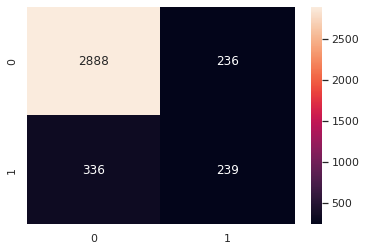

----------------------------------------------------------------------------
----------------------------------------------------------------------------
For k= 1  and metric= euclidean
Accuracy Score: 0.8399567450662341 

              precision    recall  f1-score   support

           0       0.90      0.92      0.91      3124
           1       0.48      0.43      0.45       575

    accuracy                           0.84      3699
   macro avg       0.69      0.67      0.68      3699
weighted avg       0.83      0.84      0.84      3699

Confusion Matrix


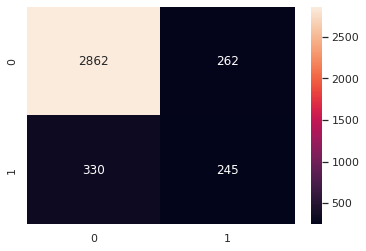

----------------------------------------------------------------------------
----------------------------------------------------------------------------
For k= 1  and metric= minkowski
Accuracy Score: 0.8399567450662341 

              precision    recall  f1-score   support

           0       0.90      0.92      0.91      3124
           1       0.48      0.43      0.45       575

    accuracy                           0.84      3699
   macro avg       0.69      0.67      0.68      3699
weighted avg       0.83      0.84      0.84      3699

Confusion Matrix


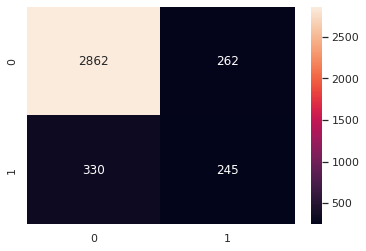

----------------------------------------------------------------------------
----------------------------------------------------------------------------
For k= 3  and metric= manhattan
Accuracy Score: 0.8688834820221681 

              precision    recall  f1-score   support

           0       0.89      0.96      0.93      3124
           1       0.64      0.35      0.46       575

    accuracy                           0.87      3699
   macro avg       0.77      0.66      0.69      3699
weighted avg       0.85      0.87      0.85      3699

Confusion Matrix


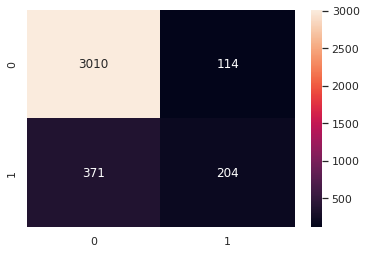

----------------------------------------------------------------------------
----------------------------------------------------------------------------
For k= 3  and metric= euclidean
Accuracy Score: 0.8653690186536902 

              precision    recall  f1-score   support

           0       0.89      0.95      0.92      3124
           1       0.60      0.39      0.47       575

    accuracy                           0.87      3699
   macro avg       0.75      0.67      0.70      3699
weighted avg       0.85      0.87      0.85      3699

Confusion Matrix


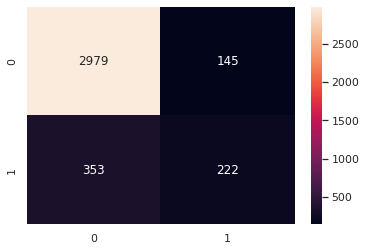

----------------------------------------------------------------------------
----------------------------------------------------------------------------
For k= 3  and metric= minkowski
Accuracy Score: 0.8653690186536902 

              precision    recall  f1-score   support

           0       0.89      0.95      0.92      3124
           1       0.60      0.39      0.47       575

    accuracy                           0.87      3699
   macro avg       0.75      0.67      0.70      3699
weighted avg       0.85      0.87      0.85      3699

Confusion Matrix


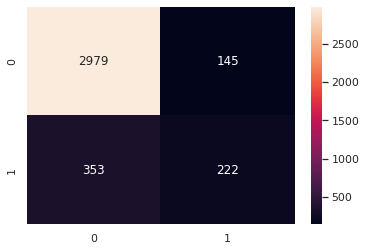

----------------------------------------------------------------------------
----------------------------------------------------------------------------
For k= 5  and metric= manhattan
Accuracy Score: 0.8726682887266829 

              precision    recall  f1-score   support

           0       0.89      0.98      0.93      3124
           1       0.70      0.31      0.43       575

    accuracy                           0.87      3699
   macro avg       0.79      0.65      0.68      3699
weighted avg       0.86      0.87      0.85      3699

Confusion Matrix


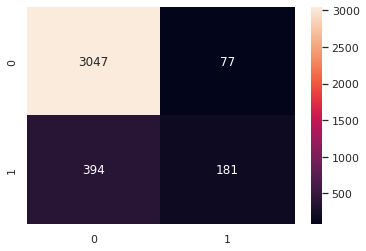

----------------------------------------------------------------------------
----------------------------------------------------------------------------
For k= 5  and metric= euclidean
Accuracy Score: 0.8718572587185726 

              precision    recall  f1-score   support

           0       0.89      0.97      0.93      3124
           1       0.67      0.34      0.45       575

    accuracy                           0.87      3699
   macro avg       0.78      0.66      0.69      3699
weighted avg       0.86      0.87      0.85      3699

Confusion Matrix


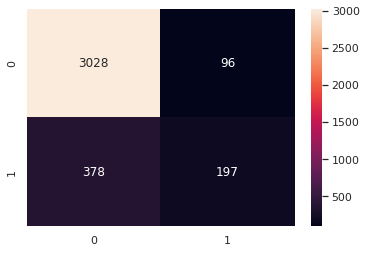

----------------------------------------------------------------------------
----------------------------------------------------------------------------
For k= 5  and metric= minkowski
Accuracy Score: 0.8718572587185726 

              precision    recall  f1-score   support

           0       0.89      0.97      0.93      3124
           1       0.67      0.34      0.45       575

    accuracy                           0.87      3699
   macro avg       0.78      0.66      0.69      3699
weighted avg       0.86      0.87      0.85      3699

Confusion Matrix


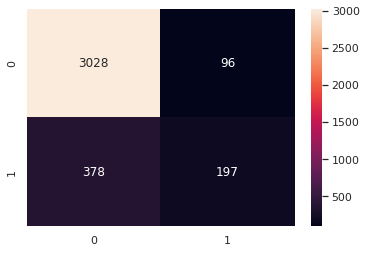

----------------------------------------------------------------------------
----------------------------------------------------------------------------


In [ ]:
score_df=pd.DataFrame(columns=column_names)

print("---------------------------K Nearest Neighbors------------------------------\n")
for k in [1,3,5]:
  for m in ["manhattan","euclidean","minkowski"]:
    model = KNeighborsClassifier(n_neighbors=k,metric= m)
    model.fit(X_train,y_train)
    predicted=model.predict(X_test)
    expected=y_test
    print("For k=",k," and metric=",m)
    accuracy=accuracy_score(expected, predicted)
    f1= f1_score(expected, predicted)
    precision=precision_score(expected, predicted)
    recall=recall_score(expected, predicted)
    algorithms_scores.append(["K Nearest Neighbors",m,k,"","","",accuracy,f1,precision,recall])
    print("Accuracy Score:",accuracy,"\n")
    print(classification_report(expected,predicted))
    print("Confusion Matrix")
    sns.heatmap(confusion_matrix(expected,predicted), annot=True,fmt="")
    plt.show()
    print("----------------------------------------------------------------------------")
    print("----------------------------------------------------------------------------")

**RandomizedSearchCV for KNN**

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
knn = KNeighborsClassifier()
knn_params = {
    "n_neighbors":[1,3,5,10,15],
    "metric": ["euclidean","minkowski","manhattan"]
}
knn_cv_model=RandomizedSearchCV(knn,knn_params,cv=10,n_jobs=-1,verbose=2).fit(X_train,y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [ ]:
knn_cv_model.best_params_

{'metric': 'euclidean', 'n_neighbors': 5}

In [ ]:
knn_tuned=KNeighborsClassifier(n_neighbors=5, metric="euclidean").fit(X_train,y_train)

In [ ]:
y_pred=knn_tuned.predict(X_test)
print("K Nearest Neighbors")
print("Accuracy: ",accuracy_score(y_test,y_pred))
print("Recall: ",recall_score(y_test,y_pred))
print("Precision: ",precision_score(y_test,y_pred))
print("F1-Score: ",f1_score(y_test,y_pred))
print("Confusion Matrix: \n",confusion_matrix(y_test,y_pred))

K Nearest Neighbors
Accuracy:  0.8718572587185726
Recall:  0.3426086956521739
Precision:  0.6723549488054608
F1-Score:  0.4539170506912442
Confusion Matrix: 
 [[3028   96]
 [ 378  197]]


### **SUPPORT VECTOR MACHINE**

---------------------------Support Vector Machine------------------------------

For linear:
----------------------------------------------------------------------------
Accuracy Score: 0.8810489321438226 

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.98      0.93      3124
           1       0.73      0.37      0.49       575

    accuracy                           0.88      3699
   macro avg       0.81      0.67      0.71      3699
weighted avg       0.87      0.88      0.86      3699



Confusion Matrix


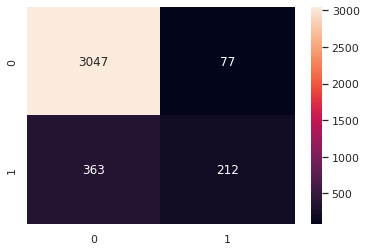

----------------------------------------------------------------------------
----------------------------------------------------------------------------
For poly:
----------------------------------------------------------------------------
Accuracy Score: 0.8824006488240065 

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.98      0.93      3124
           1       0.77      0.35      0.48       575

    accuracy                           0.88      3699
   macro avg       0.83      0.66      0.71      3699
weighted avg       0.87      0.88      0.86      3699



Confusion Matrix


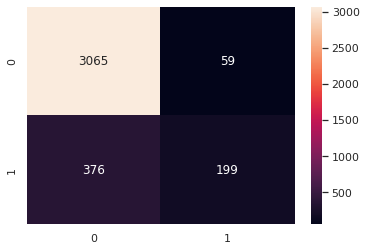

----------------------------------------------------------------------------
----------------------------------------------------------------------------
For sigmoid:
----------------------------------------------------------------------------
Accuracy Score: 0.8556366585563666 

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.94      0.92      3124
           1       0.55      0.42      0.47       575

    accuracy                           0.86      3699
   macro avg       0.72      0.68      0.69      3699
weighted avg       0.84      0.86      0.85      3699



Confusion Matrix


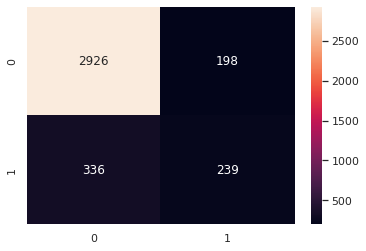

----------------------------------------------------------------------------
----------------------------------------------------------------------------
For rbf:
----------------------------------------------------------------------------
Accuracy Score: 0.8883482022168153 

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.97      0.94      3124
           1       0.73      0.45      0.55       575

    accuracy                           0.89      3699
   macro avg       0.82      0.71      0.74      3699
weighted avg       0.88      0.89      0.88      3699



Confusion Matrix


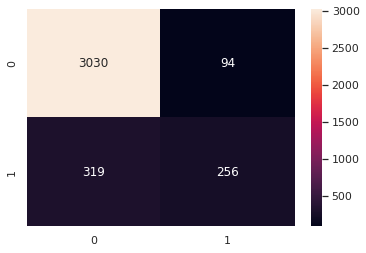

----------------------------------------------------------------------------
----------------------------------------------------------------------------


In [ ]:
kernel = ['linear','poly','sigmoid','rbf']
print("---------------------------Support Vector Machine------------------------------\n")
for k in kernel:
  svc = SVC (kernel=k, random_state=0)
  svc.fit(X_train,y_train)
  predicted=svc.predict(X_test)
  expected=y_test
  print("For "+str(k)+":")
  print("----------------------------------------------------------------------------")
  accuracy=accuracy_score(expected, predicted)
  f1= f1_score(expected, predicted)
  precision=precision_score(expected, predicted)
  recall=recall_score(expected, predicted)
  algorithms_scores.append(["Support Vector Machine","","",k,"","",accuracy,f1,precision,recall])
  print("Accuracy Score:",accuracy_score(expected, predicted),"\n")
  print("Classification Report:")
  print(classification_report(expected,predicted))
  print("\n")
  print("Confusion Matrix")
  sns.heatmap(confusion_matrix(expected,predicted), annot=True,fmt="")
  plt.show()
  print("----------------------------------------------------------------------------")
  print("----------------------------------------------------------------------------")

**RandomizedSearchCV for SVM**

In [ ]:
svm=SVC()
svm_params = {
    "C":np.arange(1,10),
    "kernel":["linear","rbf","poly","sigmoid"]
}
svm_cv_model=RandomizedSearchCV(svm,svm_params,cv=5,n_jobs=-1,verbose=2).fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


In [ ]:
svm_cv_model.best_params_

{'C': 3, 'kernel': 'rbf'}

In [ ]:
svm_tuned=SVC(C=3, kernel="rbf").fit(X_train,y_train)

In [ ]:
y_pred=svm_tuned.predict(X_test)
print("Support Vector Machine")
print("Accuracy: ",accuracy_score(y_test,y_pred))
print("Recall: ",recall_score(y_test,y_pred))
print("Precision: ",precision_score(y_test,y_pred))
print("F1-Score: ",f1_score(y_test,y_pred))
print("Confusion Matrix: \n",confusion_matrix(y_test,y_pred))

Support Vector Machine
Accuracy:  0.8918626655852934
Recall:  0.4834782608695652
Precision:  0.7296587926509186
F1-Score:  0.5815899581589958
Confusion Matrix: 
 [[3021  103]
 [ 297  278]]


### **RANDOM FOREST CLASSIFIER**

---------------------------Random Forest Classifier------------------------------

gini
Accuracy Score: 0.8980805623141389 

Classification Report:
----------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.92      0.96      0.94      3124
           1       0.73      0.55      0.63       575

    accuracy                           0.90      3699
   macro avg       0.82      0.76      0.78      3699
weighted avg       0.89      0.90      0.89      3699



Confusion Matrix


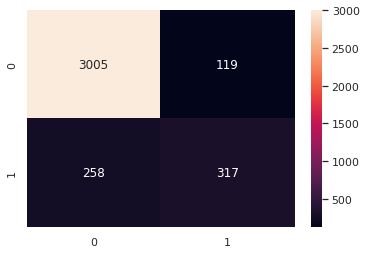

----------------------------------------------------------------------------
entropy
Accuracy Score: 0.8964585022979183 

Classification Report:
----------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.92      0.96      0.94      3124
           1       0.72      0.55      0.62       575

    accuracy                           0.90      3699
   macro avg       0.82      0.76      0.78      3699
weighted avg       0.89      0.90      0.89      3699



Confusion Matrix


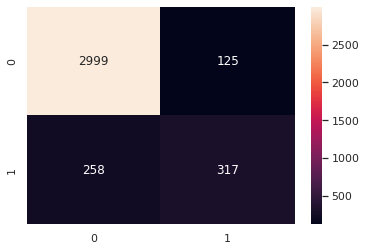

----------------------------------------------------------------------------


In [ ]:
print("---------------------------Random Forest Classifier------------------------------\n")
for c in ['gini','entropy']:
  rfc = RandomForestClassifier(n_estimators=100, criterion = c)
  rfc.fit(X_train,y_train)

  predicted = rfc.predict(X_test)
  accuracy=accuracy_score(expected, predicted)
  f1= f1_score(expected, predicted)
  precision=precision_score(expected, predicted)
  recall=recall_score(expected, predicted) 
  algorithms_scores.append(["Random Forest Classifier","","","","100",c,accuracy,f1,precision,recall])
  print(c)
  print("Accuracy Score:",accuracy_score(expected, predicted),"\n")
  print("Classification Report:")
  print("----------------------------------------------------------------------------")
  print(classification_report(expected,predicted))
  print("\n")
  print("Confusion Matrix")
  sns.heatmap(confusion_matrix(expected,predicted), annot=True,fmt="")
  plt.show()
  print("----------------------------------------------------------------------------")

**RandomizedSearchCV for RandomForestClassifier**

In [ ]:
rf =RandomForestClassifier()
rf_params ={
    "n_estimators":[100,200,500],
    "max_features":[3,5,7,8] ,
    "min_samples_split":[2,5,10], 
     "criterion" : ["gini","entropy"] 
}
rf_cv_model=RandomizedSearchCV(rf,rf_params,cv=5,n_jobs=-1,verbose=2).fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


In [ ]:
rf_cv_model.best_params_

{'criterion': 'entropy',
 'max_features': 7,
 'min_samples_split': 10,
 'n_estimators': 500}

In [ ]:
rf_tuned=RandomForestClassifier(criterion= 'entropy',max_features= 7,min_samples_split=10, n_estimators= 500).fit(X_train,y_train)

In [ ]:
y_pred=rf_tuned.predict(X_test)
print("Random Forest Classifier")
print("Accuracy: ",accuracy_score(y_test,y_pred))
print("Recall: ",recall_score(y_test,y_pred))
print("Precision: ",precision_score(y_test,y_pred))
print("F1-Score: ",f1_score(y_test,y_pred))
print("Confusion Matrix: \n",confusion_matrix(y_test,y_pred))

Random Forest Classifier
Accuracy:  0.8988915923222492
Recall:  0.5826086956521739
Precision:  0.7142857142857143
F1-Score:  0.6417624521072798
Confusion Matrix: 
 [[2990  134]
 [ 240  335]]


### **DECISION TREE CLASSIFIER**

---------------------------Decision Tree Classifier------------------------------

gini
Accuracy Score: 0.8599621519329549 

Classification Report:
----------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.92      0.92      0.92      3124
           1       0.55      0.55      0.55       575

    accuracy                           0.86      3699
   macro avg       0.73      0.73      0.73      3699
weighted avg       0.86      0.86      0.86      3699



Confusion Matrix


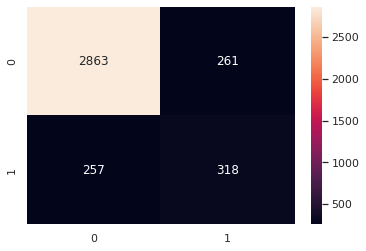

----------------------------------------------------------------------------
----------------------------------------------------------------------------
entropy
Accuracy Score: 0.8607731819410651 

Classification Report:
----------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.92      0.92      0.92      3124
           1       0.55      0.56      0.56       575

    accuracy                           0.86      3699
   macro avg       0.74      0.74      0.74      3699
weighted avg       0.86      0.86      0.86      3699



Confusion Matrix


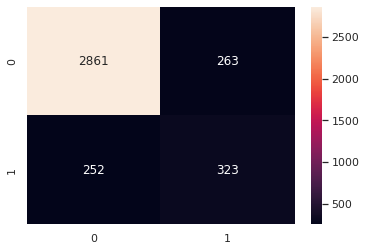

----------------------------------------------------------------------------
----------------------------------------------------------------------------


In [ ]:
print("---------------------------Decision Tree Classifier------------------------------\n")
for c in ['gini','entropy']:
  dtc = DecisionTreeClassifier(criterion = c)

  dtc.fit(X_train,y_train)
  predicted = dtc.predict(X_test)
  accuracy=accuracy_score(expected, predicted)
  f1= f1_score(expected, predicted)
  precision=precision_score(expected, predicted)
  recall=recall_score(expected, predicted)
  algorithms_scores.append(["Decision Tree Classifier","","","","",c,accuracy,f1,precision,recall])
  print(c)
  print("Accuracy Score:",accuracy_score(expected, predicted),"\n")
  print("Classification Report:")
  print("----------------------------------------------------------------------------")
  print(classification_report(expected,predicted))
  print("\n")
  print("Confusion Matrix")
  sns.heatmap(confusion_matrix(expected,predicted), annot=True,fmt="")
  plt.show()
  print("----------------------------------------------------------------------------")
  print("----------------------------------------------------------------------------")

**RandomizedSearchCV for DecisionTreeClassifier**

In [ ]:
dt =DecisionTreeClassifier()
dt_params ={
    "max_features":[3,5,7,8] ,
    "min_samples_split":[2,5,10], 
    "criterion" : ["gini","entropy"] 
}
dt_cv_model=RandomizedSearchCV(dt,dt_params,cv=5,n_jobs=-1,verbose=2).fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


In [ ]:
dt_cv_model.best_params_

{'criterion': 'gini', 'max_features': 7, 'min_samples_split': 10}

In [ ]:
dt_tuned=RandomForestClassifier(criterion= 'gini',max_features= 7,min_samples_split=10).fit(X_train,y_train)

In [ ]:
y_pred=dt_tuned.predict(X_test)
print("Decision Tree Classifier")
print("Accuracy: ",accuracy_score(y_test,y_pred))
print("Recall: ",recall_score(y_test,y_pred))
print("Precision: ",precision_score(y_test,y_pred))
print("F1-Score: ",f1_score(y_test,y_pred))
print("Confusion Matrix: \n",confusion_matrix(y_test,y_pred))

Decision Tree Classifier
Accuracy:  0.9010543390105434
Recall:  0.5843478260869566
Precision:  0.7257019438444925
F1-Score:  0.6473988439306358
Confusion Matrix: 
 [[2997  127]
 [ 239  336]]


### **Tabulation and Sorting of Results**

In [ ]:
score_df = pd.DataFrame(algorithms_scores, columns=column_names)

In [ ]:
score_df

,Algorithm,Metric,k number,Kernel,n_estimators,Criterion,Accuracy,F1-Score,Precision,Recall
0,K Nearest Neighbors,manhattan,1,,,,0.845364,0.455238,0.503158,0.415652
1,K Nearest Neighbors,euclidean,1,,,,0.839957,0.452865,0.483235,0.426087
2,K Nearest Neighbors,minkowski,1,,,,0.839957,0.452865,0.483235,0.426087
3,K Nearest Neighbors,manhattan,3,,,,0.868883,0.456887,0.641509,0.354783
4,K Nearest Neighbors,euclidean,3,,,,0.865369,0.471338,0.604905,0.386087
5,K Nearest Neighbors,minkowski,3,,,,0.865369,0.471338,0.604905,0.386087
6,K Nearest Neighbors,manhattan,5,,,,0.872668,0.434574,0.701550,0.314783
7,K Nearest Neighbors,euclidean,5,,,,0.871857,0.453917,0.672355,0.342609
8,K Nearest Neighbors,minkowski,5,,,,0.871857,0.453917,0.672355,0.342609
9,Support Vector Machine,,,linear,,,0.881049,0.490741,0.733564,0.368696


In [ ]:
score_df.sort_values(['Accuracy'], ascending=False)

,Algorithm,Metric,k number,Kernel,n_estimators,Criterion,Accuracy,F1-Score,Precision,Recall
13,Random Forest Classifier,,,,100,gini,0.898081,0.627102,0.727064,0.551304
14,Random Forest Classifier,,,,100,entropy,0.896459,0.623402,0.717195,0.551304
12,Support Vector Machine,,,rbf,,,0.888348,0.553514,0.731429,0.445217
10,Support Vector Machine,,,poly,,,0.882401,0.477791,0.771318,0.346087
9,Support Vector Machine,,,linear,,,0.881049,0.490741,0.733564,0.368696
6,K Nearest Neighbors,manhattan,5,,,,0.872668,0.434574,0.701550,0.314783
8,K Nearest Neighbors,minkowski,5,,,,0.871857,0.453917,0.672355,0.342609
7,K Nearest Neighbors,euclidean,5,,,,0.871857,0.453917,0.672355,0.342609
3,K Nearest Neighbors,manhattan,3,,,,0.868883,0.456887,0.641509,0.354783
4,K Nearest Neighbors,euclidean,3,,,,0.865369,0.471338,0.604905,0.386087


In [ ]:
score_df.sort_values(['F1-Score'], ascending=False)

,Algorithm,Metric,k number,Kernel,n_estimators,Criterion,Accuracy,F1-Score,Precision,Recall
13,Random Forest Classifier,,,,100,gini,0.898081,0.627102,0.727064,0.551304
14,Random Forest Classifier,,,,100,entropy,0.896459,0.623402,0.717195,0.551304
16,Decision Tree Classifier,,,,,entropy,0.860773,0.556417,0.551195,0.561739
12,Support Vector Machine,,,rbf,,,0.888348,0.553514,0.731429,0.445217
15,Decision Tree Classifier,,,,,gini,0.859962,0.551127,0.549223,0.553043
9,Support Vector Machine,,,linear,,,0.881049,0.490741,0.733564,0.368696
10,Support Vector Machine,,,poly,,,0.882401,0.477791,0.771318,0.346087
11,Support Vector Machine,,,sigmoid,,,0.855637,0.472332,0.546911,0.415652
4,K Nearest Neighbors,euclidean,3,,,,0.865369,0.471338,0.604905,0.386087
5,K Nearest Neighbors,minkowski,3,,,,0.865369,0.471338,0.604905,0.386087


In [ ]:
score_df.sort_values(['Precision'], ascending=False)

,Algorithm,Metric,k number,Kernel,n_estimators,Criterion,Accuracy,F1-Score,Precision,Recall
10,Support Vector Machine,,,poly,,,0.882401,0.477791,0.771318,0.346087
9,Support Vector Machine,,,linear,,,0.881049,0.490741,0.733564,0.368696
12,Support Vector Machine,,,rbf,,,0.888348,0.553514,0.731429,0.445217
13,Random Forest Classifier,,,,100,gini,0.898081,0.627102,0.727064,0.551304
14,Random Forest Classifier,,,,100,entropy,0.896459,0.623402,0.717195,0.551304
6,K Nearest Neighbors,manhattan,5,,,,0.872668,0.434574,0.701550,0.314783
8,K Nearest Neighbors,minkowski,5,,,,0.871857,0.453917,0.672355,0.342609
7,K Nearest Neighbors,euclidean,5,,,,0.871857,0.453917,0.672355,0.342609
3,K Nearest Neighbors,manhattan,3,,,,0.868883,0.456887,0.641509,0.354783
4,K Nearest Neighbors,euclidean,3,,,,0.865369,0.471338,0.604905,0.386087


In [ ]:
score_df.sort_values(['Recall'], ascending=False)

,Algorithm,Metric,k number,Kernel,n_estimators,Criterion,Accuracy,F1-Score,Precision,Recall
16,Decision Tree Classifier,,,,,entropy,0.860773,0.556417,0.551195,0.561739
15,Decision Tree Classifier,,,,,gini,0.859962,0.551127,0.549223,0.553043
14,Random Forest Classifier,,,,100,entropy,0.896459,0.623402,0.717195,0.551304
13,Random Forest Classifier,,,,100,gini,0.898081,0.627102,0.727064,0.551304
12,Support Vector Machine,,,rbf,,,0.888348,0.553514,0.731429,0.445217
1,K Nearest Neighbors,euclidean,1,,,,0.839957,0.452865,0.483235,0.426087
2,K Nearest Neighbors,minkowski,1,,,,0.839957,0.452865,0.483235,0.426087
11,Support Vector Machine,,,sigmoid,,,0.855637,0.472332,0.546911,0.415652
0,K Nearest Neighbors,manhattan,1,,,,0.845364,0.455238,0.503158,0.415652
5,K Nearest Neighbors,minkowski,3,,,,0.865369,0.471338,0.604905,0.386087


In [ ]:
score_df[score_df["Algorithm"] == "K Nearest Neighbors"]

,Algorithm,Metric,k number,Kernel,n_estimators,Criterion,Accuracy,F1-Score,Precision,Recall
0,K Nearest Neighbors,manhattan,1,,,,0.845364,0.455238,0.503158,0.415652
1,K Nearest Neighbors,euclidean,1,,,,0.839957,0.452865,0.483235,0.426087
2,K Nearest Neighbors,minkowski,1,,,,0.839957,0.452865,0.483235,0.426087
3,K Nearest Neighbors,manhattan,3,,,,0.868883,0.456887,0.641509,0.354783
4,K Nearest Neighbors,euclidean,3,,,,0.865369,0.471338,0.604905,0.386087
5,K Nearest Neighbors,minkowski,3,,,,0.865369,0.471338,0.604905,0.386087
6,K Nearest Neighbors,manhattan,5,,,,0.872668,0.434574,0.701550,0.314783
7,K Nearest Neighbors,euclidean,5,,,,0.871857,0.453917,0.672355,0.342609
8,K Nearest Neighbors,minkowski,5,,,,0.871857,0.453917,0.672355,0.342609


In [ ]:
score_df[score_df["Algorithm"] == "Support Vector Machine"]

,Algorithm,Metric,k number,Kernel,n_estimators,Criterion,Accuracy,F1-Score,Precision,Recall
9,Support Vector Machine,,,linear,,,0.881049,0.490741,0.733564,0.368696
10,Support Vector Machine,,,poly,,,0.882401,0.477791,0.771318,0.346087
11,Support Vector Machine,,,sigmoid,,,0.855637,0.472332,0.546911,0.415652
12,Support Vector Machine,,,rbf,,,0.888348,0.553514,0.731429,0.445217


In [ ]:
score_df[score_df["Algorithm"] == "Decision Tree Classifier"]

,Algorithm,Metric,k number,Kernel,n_estimators,Criterion,Accuracy,F1-Score,Precision,Recall
15,Decision Tree Classifier,,,,,gini,0.859962,0.551127,0.549223,0.553043
16,Decision Tree Classifier,,,,,entropy,0.860773,0.556417,0.551195,0.561739


In [ ]:
score_df[score_df["Algorithm"] == "Random Forest Classifier"]

,Algorithm,Metric,k number,Kernel,n_estimators,Criterion,Accuracy,F1-Score,Precision,Recall
13,Random Forest Classifier,,,,100,gini,0.898081,0.627102,0.727064,0.551304
14,Random Forest Classifier,,,,100,entropy,0.896459,0.623402,0.717195,0.551304
